Set up working directory

In [1]:
import os
os.chdir(r'D:\Linux\Code\research\thlab\triton\ichor')
os.getcwd()

Import Amphitrite and other libraries

In [2]:
from ichorlib.msClasses.MassSpectrum import MassSpectrum
from ichorlib.genClasses.PeakPicking import PeakPicking
from ichorlib.msClasses.MsCSD import MsCSD
from ichorlib.genClasses.colorPalette import tableau20
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl


#print __version__ # requires version >= 1.9.0

init_notebook_mode(connected=True)

#import plotly.plotly as py
#import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objects as go
#from plotly.graph_objs import *

In [48]:
filename = 'data/degQMSMS-chargeStripped.txt'
grain_param = 10
poly_order_param = 5
smoothes_param = 2
window_len_param = 10
simul_peak_fwhh = 75

ms = MassSpectrum()

ms.read_text_file(filename, grain=grain_param, normalisationtype='bpi')

# smoothing and value changes
ms.smoothingSG(poly_order=poly_order_param, smoothes=smoothes_param, window_len=window_len_param)
ms.normalisation_bpi()
# #ms.select_ms_range(4200,9000)

fig = go.Figure()
fig.add_trace(go.Scattergl(
    x = ms.xvals,
    y = ms.yvals,
    mode='lines',
))

# fig = plt.figure(figsize=(12, 8))
# ax = plt.subplot(111)
# ms.plot_simulated_spectrum_simple(ax, color=tableau20[0])

#plt.show()
#plotly_fig = tls.mpl_to_plotly( fig )
#iplot(plotly_fig)

[[MsPeak] id 0 m/z 15694.13 intensity 13.19507711942638 charge 0,
 [MsPeak] id 1 m/z 15732.93 intensity 9.389779522792505 charge 0,
 [MsPeak] id 2 m/z 15794.01 intensity 12.53849342924249 charge 0,
 [MsPeak] id 3 m/z 15829.22 intensity 8.819864352137271 charge 0,
 [MsPeak] id 4 m/z 15890.47 intensity 8.953116204814373 charge 0,
 [MsPeak] id 5 m/z 15976.05 intensity 11.417627646634605 charge 0,
 [MsPeak] id 6 m/z 16018.94 intensity 9.402898854560934 charge 0,
 [MsPeak] id 7 m/z 16076.81 intensity 14.567816110305653 charge 0,
 [MsPeak] id 8 m/z 16116.28 intensity 21.465444601641018 charge 0,
 [MsPeak] id 9 m/z 16165.34 intensity 7.112983941810222 charge 0,
 [MsPeak] id 10 m/z 16244.14 intensity 15.461395336229696 charge 0,
 [MsPeak] id 11 m/z 16300.73 intensity 12.590787733517214 charge 0,
 [MsPeak] id 12 m/z 16345.94 intensity 10.279287743907862 charge 0,
 [MsPeak] id 13 m/z 16425.16 intensity 9.14959679257556 charge 0,
 [MsPeak] id 14 m/z 16472.23 intensity 10.297395388990562 charge 0,

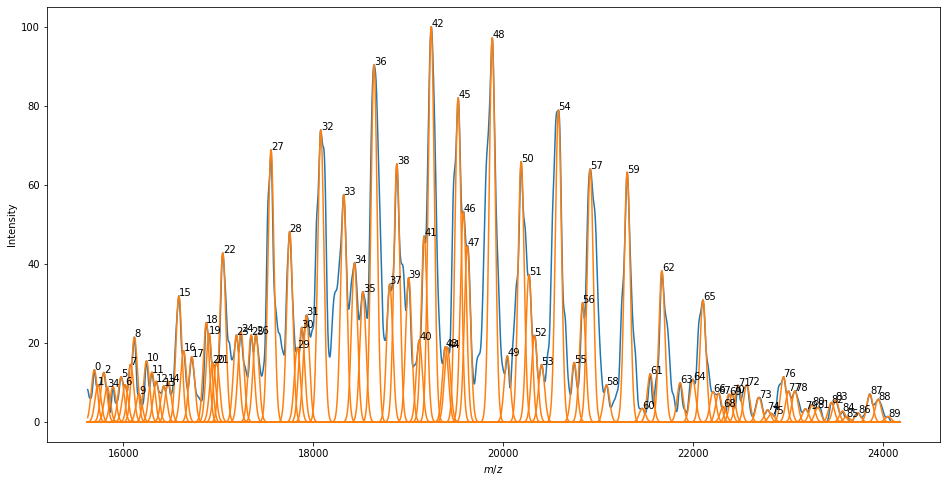

In [56]:
import pprint

pp = PeakPicking()
gradient = pp.calculate_gradient(ms.xvals, ms.yvals)
indices = pp.find_peaks(1)
pprint.pprint(indices)
fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
ms.plot_simulated_spectrum_simple(ax, color=tableau20[0])

for peak in indices:
     peak.plotSimulatedPeak(ax, ms.xvals, fwhm=simul_peak_fwhh, color=tableau20[2])


In [60]:
init_notebook_mode(connected=True)
from scipy.signal import find_peaks
from scipy.signal import argrelmax, argrelmin
import pprint
import numpy as np
import pandas as pd
import peakutils

indices, top = find_peaks(ms.yvals, prominence=1)
pprint.pprint(top)

fig = go.Figure()
fig.add_trace(go.Scattergl(
    y = ms.yvals,
    mode = 'lines',
    name = 'ATD+Peaks'
))

fig.add_trace(go.Scattergl(
    x = indices,
    y = [ms.yvals[j] for j in indices],
    mode = 'markers',
    marker = dict(
        size = 8,
        color = 'red',
        symbol = 'cross'
    ),
    name = 'CCS Peaks'
))

fig.show()

{'left_bases': array([  16,   52,  129,  129,  129,  307,  350,  377,  415,  415,  129,
        561,  637,  129,  804,  804,  889,  889,  129, 1085, 1165, 1165,
        129, 1326, 1426, 1481,  129, 1615, 1615, 1722, 1759,  129, 1909,
       1909, 2070, 2222, 2250, 2393, 2250, 2550, 2550, 2550, 2714, 2748,
       2915, 2915, 3067, 3115, 3115, 3302, 3302, 3302, 3431, 3488, 3534,
       3614, 3665, 3774, 3893, 3774, 3996], dtype=int64),
 'prominences': array([ 7.23905398,  3.51678148,  4.1643532 ,  3.75328016, 17.31200524,
        8.56697747,  3.75678455,  1.35219014,  1.28105522,  3.05177821,
       26.61450063,  8.20040528, 11.19173032, 31.402033  ,  4.20582396,
        7.01615964,  4.16386479, 10.58817133, 51.86149804, 30.58791577,
        3.04718259,  5.5344335 , 57.42467589, 31.59808238, 11.71330228,
        6.71921356, 76.39715127,  1.6030922 , 44.64034658,  8.30326482,
        1.72094162, 97.53348741,  1.53708635, 67.15219664, 87.50768778,
        4.50298126, 55.64724186,  3.555973

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(212)
ax2 = plt.subplot(211)
ms.plot_simulated_spectrum_simple(ax2, color=tableau20[0])
for peak in found_peaks:
    peak.plotSimulatedPeak(ax2, ms.xvals, fwhm=simul_peak_fwhh, color=tableau20[2])

peaks_for_csds = [
    [32,36,42,48,54],
    [38,45,50],
    [28,33,41]
    
]
    
ms.csds = []
for count, peak_set in  enumerate(peaks_for_csds):
    CSD1 = MsCSD()
    CSD1.name = 'CSD' + str(count)
    CSD1.p_fwhh = simul_peak_fwhh
    CSD1_peak_indexes = peak_set
    indexed_peaks = pp.get_peaks_using_indexes(CSD1_peak_indexes)
    CSD1.mspeaks = indexed_peaks
    CSD1.calculateMassAndCharges(CSD1.mspeaks)
    CSD1.optimiseParameters()
    CSD1.estimateCharges(5)
    CSD1.plot_residuals_per_peak(ax, CSD1.mspeaks, marker='x', color=tableau20[count])
    ms.csds.append(CSD1)

plt.plot()
plotly_fig = tls.mpl_to_plotly( fig )
iplot(plotly_fig)

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ms.plot_simulated_spectrum_simple(ax, color=tableau20[0])

for counter, csd in enumerate(ms.csds):
    csd.plot_csd_gaussian(ax, ms.xvals, color=tableau20[counter])
    csd.plot_simulated_species(ax, ms.xvals, color=tableau20[counter])

for peak in found_peaks:
    peak.plotSimulatedPeak(ax, ms.xvals, fwhm=simul_peak_fwhh, color='grey')


plt.plot()
#plotly_fig = tls.mpl_to_plotly( fig )
#iplot(plotly_fig)

In [ ]:
#CSD2.filter_theoretical_peaks_using_charges([56, 57, 58, 59])
#CSD3.filter_theoretical_peaks_using_charges([45, 46, 47, 48, 49, 50])
#CSD4.filter_theoretical_peaks_using_charges([53, 54, 55, 56, 57, 58, 58, 59, 60])
#CSD5.filter_theoretical_peaks_using_charges([64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74])

In [ ]:
ms.leastSquaresOptimisation(fixed_p_fwhh=simul_peak_fwhh)
#ms.leastSquaresOptimisation()

In [ ]:
fig = plt.figure(figsize=(16, 9))
#plt.figure(figsize=(12, 8))
#plt.rcParams["font.family"] = "Times"
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ms.plot_simulated_spectrum(ax, showcharges='False')

plt.show()

#plotly_fig = tls.mpl_to_plotly( fig )

#iplot(plotly_fig, 'png')


In [ ]:
CSD4 = MsCSD()
CSD4.name = 'CSD4'
CSD4.p_fwhh = 10
CSD4_peak_indexes = [20,21,22,23,24,25,26,27]
indexed_peaks = pp.get_peaks_using_indexes(CSD4_peak_indexes)
CSD4.mspeaks = indexed_peaks
CSD4.calculateMassAndCharges(CSD4.mspeaks)
CSD4.optimiseParameters()
CSD4.estimateCharges(5)
#CSD2.filter_theoretical_peaks_using_charges([56, 57, 58, 59])
CSD4.plot_residuals_per_peak(ax, CSD4.mspeaks, marker='x', color='blue',)
plt.plot()

In [ ]:
CSD5 = MsCSD()
CSD5.name = 'CSD5'
CSD5.p_fwhh = 10
CSD5_peak_indexes = [29,30,31,32,33,34,35]
indexed_peaks = pp.get_peaks_using_indexes(CSD5_peak_indexes)
CSD5.mspeaks = indexed_peaks
CSD5.calculateMassAndCharges(CSD5.mspeaks)
CSD5.optimiseParameters()
CSD5.estimateCharges(5)
#CSD2.filter_theoretical_peaks_using_charges([56, 57, 58, 59])
CSD5.plot_residuals_per_peak(ax, CSD5.mspeaks, marker='x', color='blue',)
plt.plot()